In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
root_path = 'gdrive/My Drive/Datasets/'
train_path = 'gdrive/My Drive/Datasets/trainC'
test_path = 'gdrive/My Drive/Datasets/testC'

In [33]:
import os
os.listdir(root_path)

['train', 'test', 'trainC', 'testC']

In [34]:
from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [35]:
IMAGE_SIZE = [224, 224]

In [36]:
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)
inceptionResNet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

219070464/219055592 [==============================] - 1s 0us/step


In [37]:
for layer in inceptionResNet.layers:
    layer.trainable = False

In [38]:
folders = glob(train_path + '/*')
folders

['gdrive/My Drive/Datasets/trainC/covid',
 'gdrive/My Drive/Datasets/trainC/normal']

In [39]:
x = Flatten()(inceptionResNet.output)

In [40]:
prediction = Dense(len(folders), activation='softmax')(x)

In [41]:
model = Model(inputs=inceptionResNet.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [42]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3855 images belonging to 2 classes.


In [45]:
training_set.class_indices

{'covid': 0, 'normal': 1}

In [46]:
testing_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 410 images belonging to 2 classes.


In [47]:
testing_set.class_indices

{'covid': 0, 'normal': 1}

In [48]:
result = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 98%
# accuracy: 99%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
121/121 [==============================] - 76s 535ms/step - loss: 1.5105 - accuracy: 0.8586 - val_loss: 0.2600 - val_accuracy: 0.9683
Epoch 2/10
121/121 [==============================] - 60s 494ms/step - loss: 0.6828 - accuracy: 0.9061 - val_loss: 0.3165 - val_accuracy: 0.9463
Epoch 3/10
121/121 [==============================] - 59s 490ms/step - loss: 0.9941 - accuracy: 0.8955 - val_loss: 0.4692 - val_accuracy: 0.9488
Epoch 4/10
121/121 [==============================] - 59s 490ms/step - loss: 1.2315 - accuracy: 0.8952 - val_loss: 0.0720 - val_accuracy: 0.9854
Epoch 5/10
121/121 [==============================] - 61s 502ms/step - loss: 0.9205 - accuracy: 0.9157 - val_loss: 0.1124 - val_accuracy: 0.9805
Epoch 6/10
121/121 [==============================] - 60s 496ms/step - loss: 0.5775 - accuracy: 0.9372 - val_loss: 0.0927 - val_accuracy: 0.9878
Epoch 7/10
121/121 [==============================] - 60s 496ms/step - loss: 0.7374 - accuracy: 0.9266 - val_loss: 0.0904 - val_ac

In [49]:
#getting the accuracy
model.evaluate_generator(training_set)
# output [loss, accuracy]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.40603724122047424, 0.9559014439582825]

In [50]:
#getting the validation accuracy
model.evaluate_generator(testing_set)
# output [val_loss, val_acc]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.12451763451099396, 0.9829268455505371]

[[210   0]
 [200   0]]
Testing Accuracy: 0.5121951219512195
Sensitivity: 0.5121951219512195
Specificity: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in long_scalars


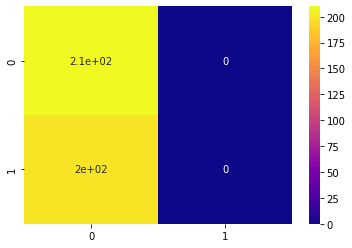

In [51]:
# Generate Confusion Matrix
import tensorflow as tf
y_actual = []
y_test = []

for i in os.listdir(test_path + '/normal/'):
    img = image.load_img((test_path + '/normal/')+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(0)
    
for i in os.listdir(test_path + '/covid/'):
    img = image.load_img((test_path + '/covid/')+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    p = np.argmax(p,axis=1)
    y_test.append(p[0])
    y_actual.append(1)
    
y_actual = np.array(y_actual)
y_test = np.array(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)

import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)

model_TP = cm[0][0]
model_TN = cm[1][1]
model_FN = cm[1][0]
model_FP = cm[0][1]

print(cm)
print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
print("Sensitivity:", (model_TP) / (model_TP + model_FN))
print("Specificity:", (model_TN) / (model_TN + model_FP))

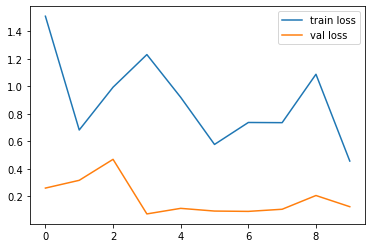

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

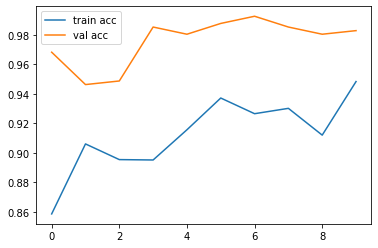

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
import tensorflow as tf
from keras.models import load_model

model.save('model_vgg16_covid_v3.h5')

In [55]:
# Resnet